# Исследование объявлений о продаже квартир

**Цель исследования:** необходимо выявить параметры влияющие на стоимость недвижимости, по которым можно будет определить, цена за недвижимость правдоподобна или стоит отнести объявление к разряду мошенических.

**Входные данные:** данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет.

**План работы:** 1. подготовить данные, т.е. выявить и удалить (заменить) пропущенные значения и дубликаты; 2. на основании параметров определить, корреляция каких данных более показательна; 3. вывести гистограмы для наглядности и сделать выводы, какие именно параметры лучше использовать.

Данное исследование необходимо для построения автоматизированной системы, которая позволит отследить аномалии и мошенническую деятельность.

### Откройте файл с данными и изучите общую информацию. 

**Импортируем данные в датасет**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
try: data = pd.read_csv('C:/Users/user/Downloads/real_estate_data.csv', sep='\t')
except: data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', None)

**Изучаем общую информацию о полученных данных**

In [3]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Вывод:**

Из полученных данных, видим, что в большей части столбцов присутствую пропуски. 

Причина пропусков в данных "добавленных пользователем": опечатка, не захотели предоставлять данные, их не было у размещающего объявление на момент публикации, например риэлтору продавец не предоставил данные. Здесь нужна предоработка: удаление пропусков в данных с незначительным количеством строк таких как floors_total и locality_name, логическая замена пропусков в столбцах таких как ceiling_height, living_area, kitchen_area, balcony, is_apartment.

Причина пропусков в "картографических" данных - отсутствие аэропортов, парков и прудов возле объекта недвижимости и большая удаленность от центра населенного пункта. Думаю, что это незначительный параметр, который не повлияет на цель исследования, это больше как дополнительное преимущество в выборе недвижимости, чем основной критерий, такой как цена, площадь, этаж.

**Строим гистограммы**

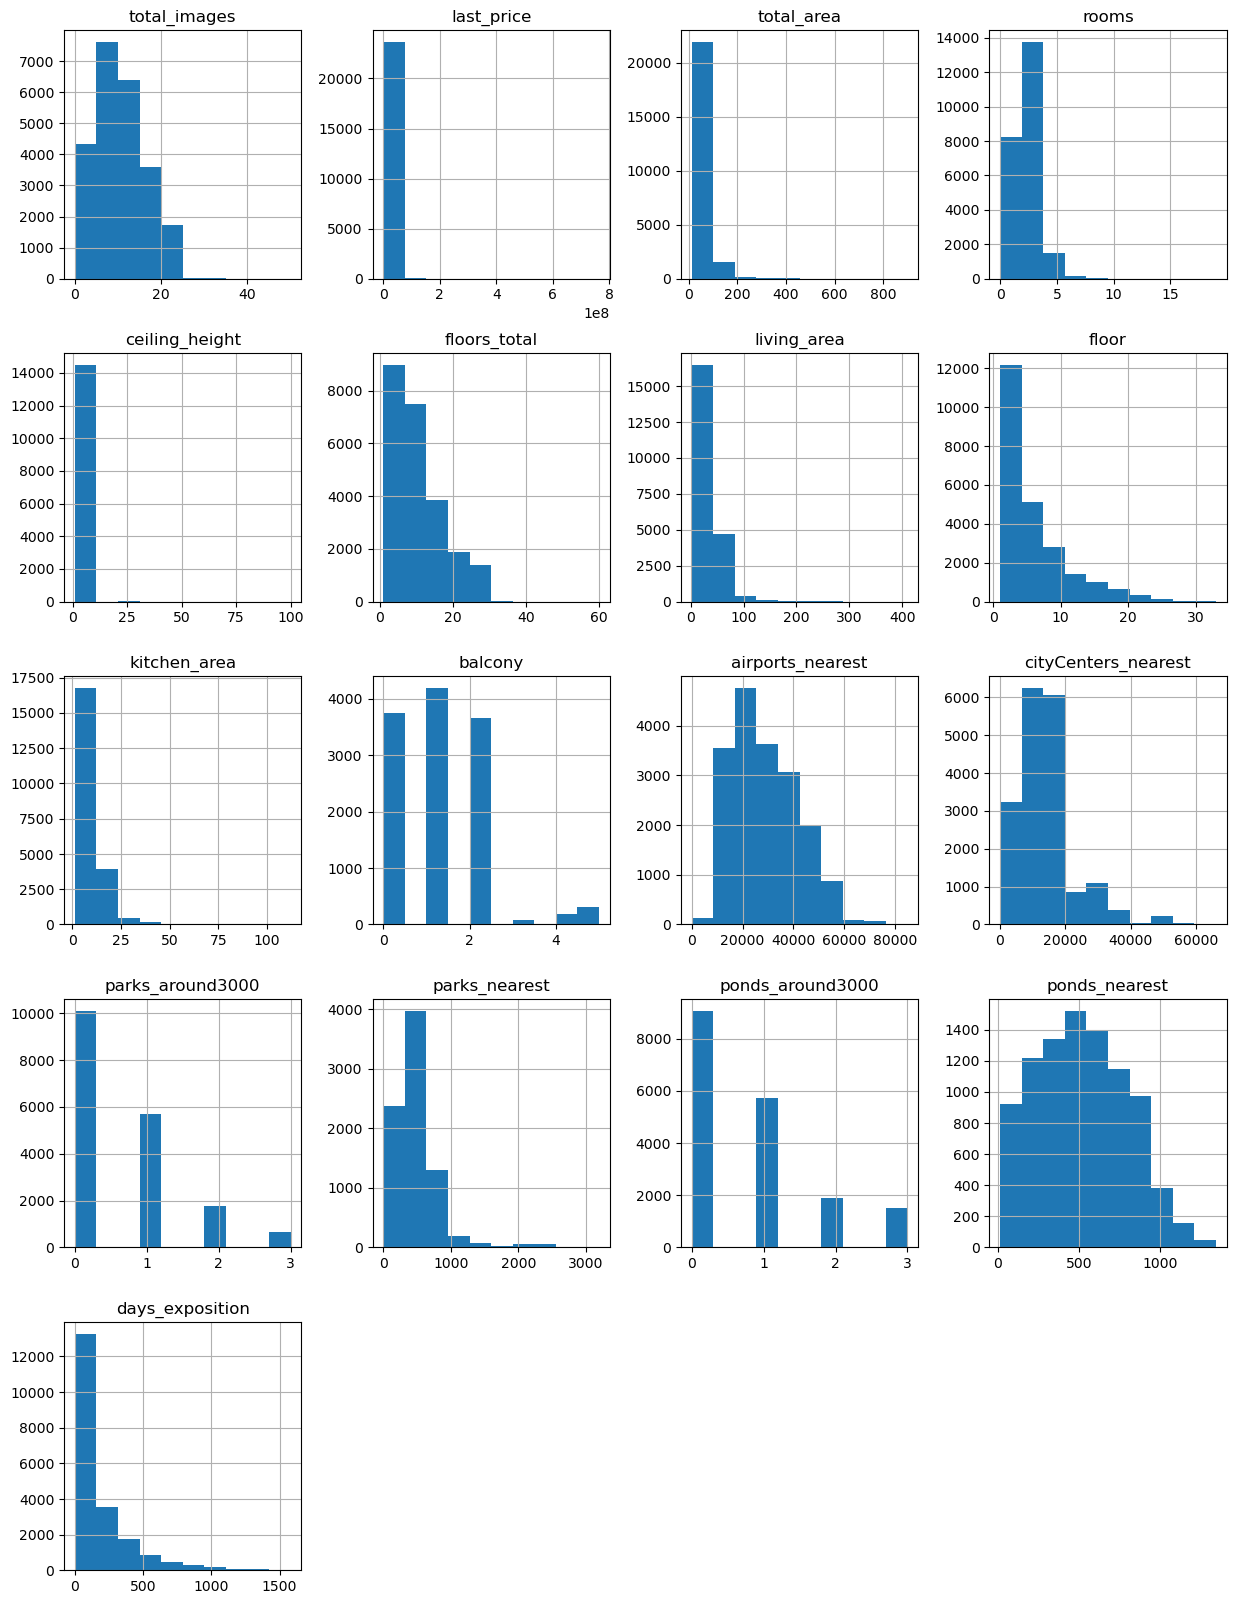

In [5]:
data.hist(figsize=(15, 20));

**Вывод:**

На гистограммах видно, что в данных есть большое количество пиков, многие из которых приближены к 0, что не является истиной. Сомневаюсь, что есть квартиры в аэропорту или стоимость какой-либо недвижимости равна 0. Вообщем требуется предобработка данных.

### Предобработка данных

**Работа с пропущенными значениями**

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
data.isna().mean()*100

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
cityCenters_nearest     23.287902
parks_around3000        23.283683
parks_nearest           65.909954
ponds_around3000        23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

Выведем долю всех пропусков

In [8]:
data.loc[data['ceiling_height'] > 20] = data['ceiling_height'] / 10
data['ceiling_height'] = data['ceiling_height'].fillna(2.5)
#data['ceiling_height'].unique()

•	ceiling_height — высота потолков (м) - в 38% строк пропущена высота потолков, если удалим эти строки, потеряем большой объем данных, поэтому заменим на стандартный минимум в 2,5 м. Значения же в 25 и 32 метров, скорее всего опечатка, приведем эти данные в соответствие, т.е. 2,5 и 3,2 м. 

In [9]:
data.dropna(subset=['floors_total'], inplace=True)
data.dropna(subset=['locality_name'], inplace=True)

•	floors_total — всего этажей в доме и • locality_name — название населённого пункта - количество строк с пропусками незначительное всего 0,36%, думаю на исследование не повлияет, удалим строки.

In [10]:
living_mean = data['living_area'].mean() / data['total_area'].mean()
kitchen_mean = data['kitchen_area'].mean() / data['total_area'].mean()
data['living_area'].fillna(living_mean * data['total_area'], inplace=True)
data['kitchen_area'].fillna(kitchen_mean * data['total_area'], inplace=True)

•	living_area — жилая площадь в квадратных метрах (м²) - всего 8% строк с пропусками, думаю лучше заполнить отношением средних значений жилой площади к общей площади чем оставлять пропуски.

•	kitchen_area — площадь кухни в квадратных метрах (м²) - всего 9,6% строк с пропусками, думаю здесь тоже лучше заполнить отношением средних значений площади кухни к общей площади чем оставлять пропуски.

In [11]:
data['is_apartment'] = data['is_apartment'].fillna('False')

•	is_apartment — апартаменты (булев тип)- всего 88% строк с пропсками, однозначно замена пропусков, а не удаление, здесь заменим на False.

In [12]:
data['balcony'] = data['balcony'].fillna(0)

•	balcony — число балконов - 48,6% строк с пропусками, тоже достаточно много, произведем замену, скорее всего в данных квартирах нет балконов, заменим на 0.

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  float64
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  float64
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  float64
 9   is_apartment          23565 non-null  object 
 10  studio                23565 non-null  object 
 11  open_plan             23565 non-null  object 
 12  kitchen_area          23565 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

**Вывод:**

После проведения предобработки, количество строк в 23699 уменьшилось до 23565, но теперь это приемлемые для исследования данные без пропусков, дубликатов и аномалий. Их в принципе вполне достаточно, уменьшение количества не повлияет на итог исследования.

**Изменение типа данных**

In [14]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [15]:
list = ['last_price', 'rooms', 'floor', 'floors_total']
for row in list:
    data[row] = data[row].astype('int64')

**Вывод:**

Изменение типа данных необходимо для удобства в дальнейшем исследовании и построении гистограмм и сводных таблиц.

    last_price - приводим целочисленному типу, для удобства вычисления средней стоимости квадратного метра.
    first_day_exposition - приводим к типу даты , это необходимо, чтобы разбить объявления по категориям день, месяц, год публикации.
    rooms - приводим целочисленному типу.
    floor - приводим целочисленному типу.
    floors_total - приводим целочисленному типу, для дальнейшей категоризации.
    days_exposition - приводим целочисленному типу.

**Изучение уникальных значений**

In [16]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [17]:
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'].nunique()

329

Для начала приведем все названия к нижнему регистру и заменим ё на е.

In [18]:
word_list = ['поселок', 'деревня', 'городской', 'коттеджный', 'посёлок', 'поселок городского типа', 'посёлок городского типа', 'городской посёлок', 'городской поселок', 'село', 'садовое товарищество', 'садовое некоммерческое товарищество', 'коттеджный поселок', 'коттеджный посёлок', 'городского типа']
name = ''
for d in word_list:
    data['locality_name'] = data['locality_name'].str.replace(d, name, regex=True).str.strip()
data['locality_name'].nunique()

307

Заменяем неявные дубликаты в столбце с названиями.

In [19]:
data.duplicated().sum()

21

In [20]:
data = data.drop_duplicates().reset_index(drop=True)
data.duplicated().sum()

0

Теперь найдем явные дубликаты и удалим их.

**Вывод:**

Благодаря избавлению от дубликатов в столбце с названием населеных пунктов, можно сортировать данные по населенным пунктам и производить расчеты для каждой группы отдельно. 

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23544 entries, 0 to 23543
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23544 non-null  float64       
 1   last_price            23544 non-null  int64         
 2   total_area            23544 non-null  float64       
 3   first_day_exposition  23544 non-null  datetime64[ns]
 4   rooms                 23544 non-null  int64         
 5   ceiling_height        23544 non-null  float64       
 6   floors_total          23544 non-null  int64         
 7   living_area           23544 non-null  float64       
 8   floor                 23544 non-null  int64         
 9   is_apartment          23544 non-null  object        
 10  studio                23544 non-null  object        
 11  open_plan             23544 non-null  object        
 12  kitchen_area          23544 non-null  float64       
 13  balcony         

In [22]:
data['last_price'] = data['last_price'] /1000000

Чтобы стоимость была более привычной, разделим на 1 млн.р.    

In [23]:
data['last_price'].agg(['min','max','mean','median'])

min         0.000003
max       763.000000
mean        6.541417
median      4.650000
Name: last_price, dtype: float64

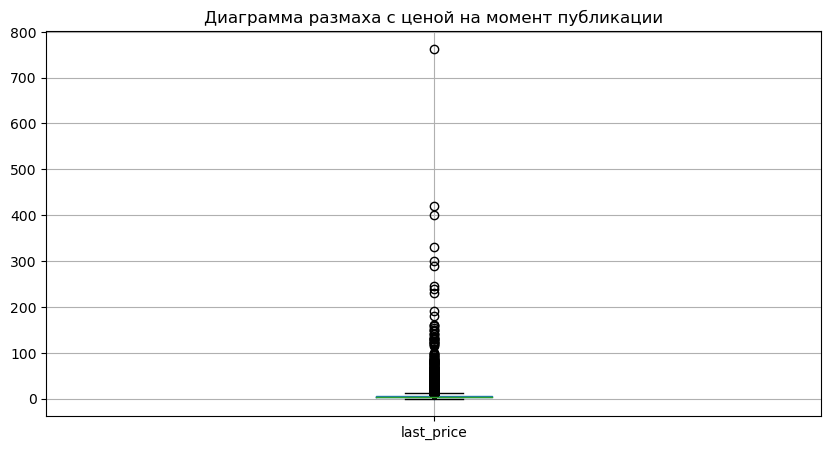

In [24]:
data.boxplot(column=['last_price'], figsize=(10,5), grid=True)
plt.title('Диаграмма размаха с ценой на момент публикации')
plt.show()

In [25]:
data = data.query('last_price < 100')

Судя по "ящику с усами", в данных есть объекты стоимостью свыше 100 млн.р., допускаю, что такое возможно, например, для элитной недвижимости, промышленной недвижимости или недвижимости в офисных зданиях. Но нас интересуют среднестатистические объекты - квартиры, поэтому недвижимость стоимостью свыше 100 млн.р убираем из исследования.

In [26]:
data['rooms'].agg(['min','max','mean','median'])

min        0.000000
max       19.000000
mean       2.065895
median     2.000000
Name: rooms, dtype: float64

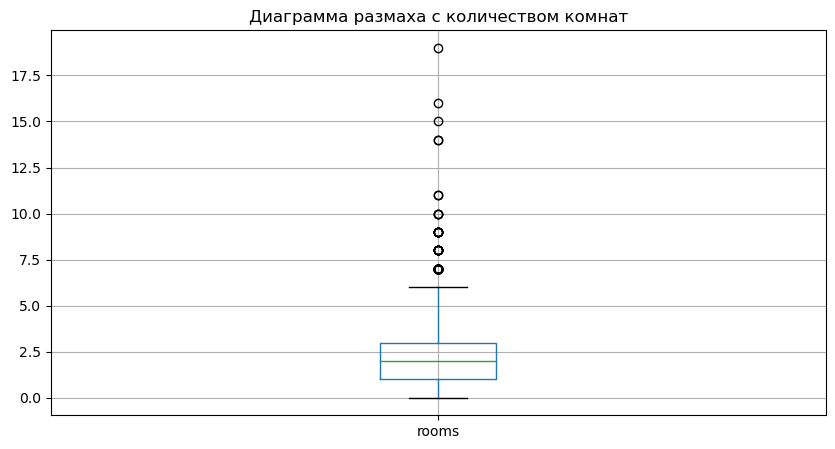

In [27]:
data.boxplot(column=['rooms'], figsize=(10,5), grid=True)
plt.title('Диаграмма размаха с количеством комнат')
plt.show()

In [28]:
data = data.query('rooms < 7')

Здесь видим объекты с количеством комнат свыше 7, я думаю такие объекты тоже можно исключить из исследования, т.к. такие объекты больше походят на элитные, а как я уже писала, нас больше интересуют среднестатистические.

In [29]:
data['total_area'].agg(['min','max','mean','median'])

min         2.500000
max       507.000000
mean       59.221518
median     52.000000
Name: total_area, dtype: float64

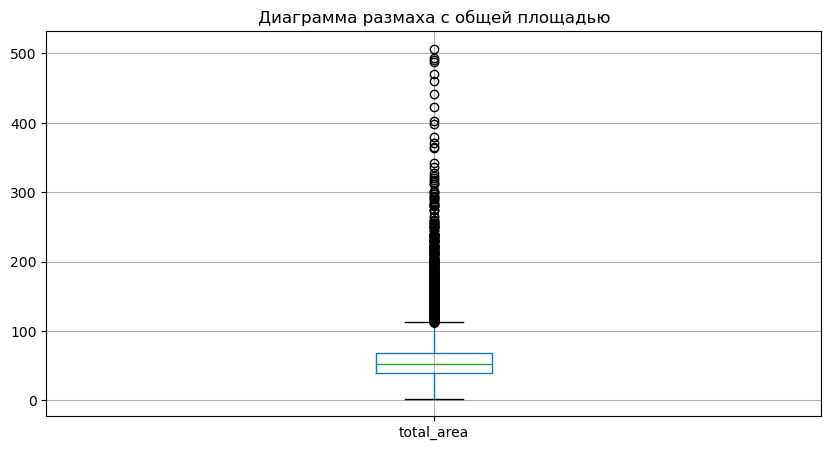

In [30]:
data.boxplot(column=['total_area'], figsize=(10,5), grid=True)
plt.title('Диаграмма размаха с общей площадью')
plt.show()

In [31]:
data = data.query('total_area < 200')

Общую площадь недвижимости тоже оставим среднестатистическую и уберем из данных недвижимость с общей площадью свыше 200 кв.м.

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23284 entries, 0 to 23543
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23284 non-null  float64       
 1   last_price            23284 non-null  float64       
 2   total_area            23284 non-null  float64       
 3   first_day_exposition  23284 non-null  datetime64[ns]
 4   rooms                 23284 non-null  int64         
 5   ceiling_height        23284 non-null  float64       
 6   floors_total          23284 non-null  int64         
 7   living_area           23284 non-null  float64       
 8   floor                 23284 non-null  int64         
 9   is_apartment          23284 non-null  object        
 10  studio                23284 non-null  object        
 11  open_plan             23284 non-null  object        
 12  kitchen_area          23284 non-null  float64       
 13  balcony         

### Посчитайте и добавьте в таблицу новые столбцы

In [33]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

Добавляем столбцы с разделением по категориям: день, месяц, год

In [34]:
data['mk_price'] = data['last_price'] / data['total_area']
#data['mk_price'] = data['mk_price'].astype('int64')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,weekday,month,year,mk_price
0,20.0,13.000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,False,False,25.000000,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,3,3,2019,0.120370
1,7.0,3.350,40.4,2018-12-04,1,2.50,11,18.600000,1,False,False,False,11.000000,2.0,шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,1,12,2018,0.082921
2,10.0,5.196,56.0,2015-08-20,2,2.50,5,34.300000,4,False,False,False,8.300000,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,3,8,2015,0.092786
3,0.0,64.900,159.0,2015-07-24,3,2.50,14,90.806781,9,False,False,False,27.839416,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,4,7,2015,0.408176
4,2.0,10.000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,False,False,41.000000,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,1,6,2018,0.100000


Добавляем столбец со стоимостью квадратного метра (mk_price) и приводим его в целочисленный тип

In [35]:
def floor_type(row):
    floor = row['floor'] 
    floors_total = row['floors_total']

    if (floor == 1) and (floors_total != 0):
         return'первый ' 
    elif floor == floors_total:
         return'последний'
    else:
         return'другой'

data['floor_type'] = data.apply(floor_type, axis = 1)
#data.head()

Добавляем столбец с типом этажа квартиры со значениями "первый", "последний", "другой"

In [36]:
data['city_centers_m'] = (data['cityCenters_nearest']/1000).round()
data.head() 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,weekday,month,year,mk_price,floor_type,city_centers_m
0,20.0,13.000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,False,False,25.000000,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,3,3,2019,0.120370,другой,16.0
1,7.0,3.350,40.4,2018-12-04,1,2.50,11,18.600000,1,False,False,False,11.000000,2.0,шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,1,12,2018,0.082921,первый,19.0
2,10.0,5.196,56.0,2015-08-20,2,2.50,5,34.300000,4,False,False,False,8.300000,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,3,8,2015,0.092786,другой,14.0
3,0.0,64.900,159.0,2015-07-24,3,2.50,14,90.806781,9,False,False,False,27.839416,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,4,7,2015,0.408176,другой,7.0
4,2.0,10.000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,False,False,41.000000,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,1,6,2018,0.100000,другой,8.0


Добавляем столбец с расстоянием до центра в метрах

**Вывод:**

Проведенная категоризация значительно упростит дальнейшее исследование. Новые столбцы понадобятся для дальнейшей сортировки данных и проведения различных расчетов.

### Проведите исследовательский анализ данных

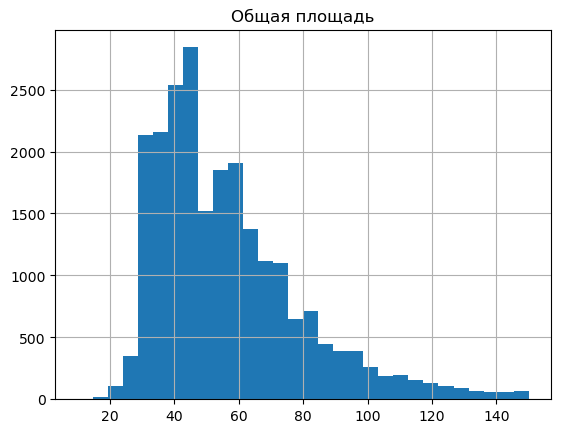

In [37]:
data.hist('total_area', bins=30, range=(10,150));
plt.title('Общая площадь');

Общая площадь

На гистограмме видим, что большую часть объявлений составляют квартиры от 30 до 60 кв. м., присутствуют квартиры с площадью более 100 кв.м. это может же быть нежилая недвижимость, офисы, производственные помещения и т.д. Если в объявлении будет указана жилая площадь и цена за квадратный метр, которая будет выше средней, значит перед нами элитная недвижимость. Квартиры с общей площадью менее 20 кв.м. относить к выбросам не будем, т.к. такие квартиры существуют в реальности.

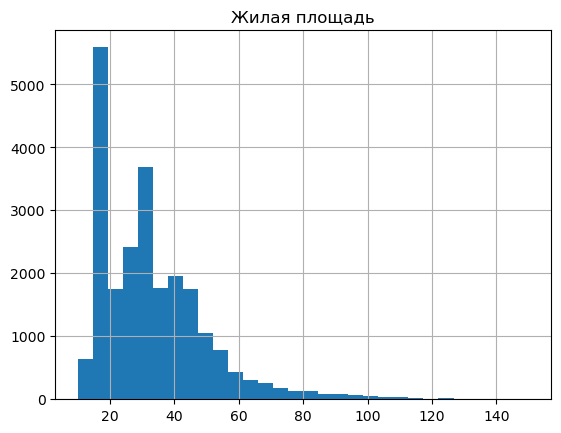

In [38]:
data.hist('living_area', bins=30, range=(10,150));
plt.title('Жилая площадь');

Жилая площадь

Наблюдаем два пика, 15-18 кв.м. - это, скорее всего однокомнатные квартиры, и 25-30 к.м. - это двухкомнатные квартиры. Самые распространённые объявления с жилой площадью от 15 до 50 кв.м., единичные объявления от 100 кв.м., что и объяснимо тем, что обычные "однушки", "двушки" покупают чаще и их в принципе больше, чем элитной недвижимости. 

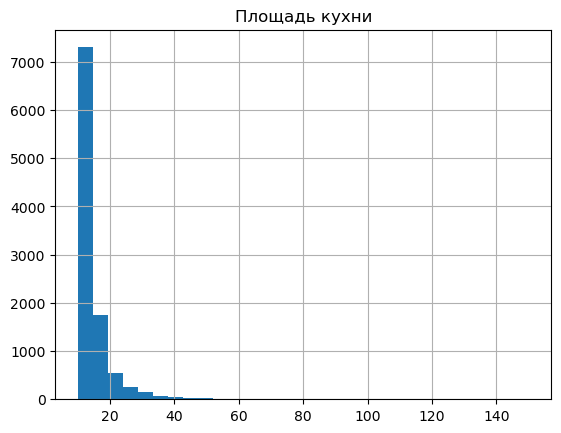

In [39]:
data.hist('kitchen_area', bins=30, range=(10,150));
plt.title('Площадь кухни');

Площадь кухни

Здесь тоже все закономерно, пик на показателях от 10 до 15 кв.м. - это самая распространенная площадь кухни. Кухни площадью от 25 кв.м. встречаются реже, т.к. сравнительно недавно стали строить квартиры с кухнями большей площадью.

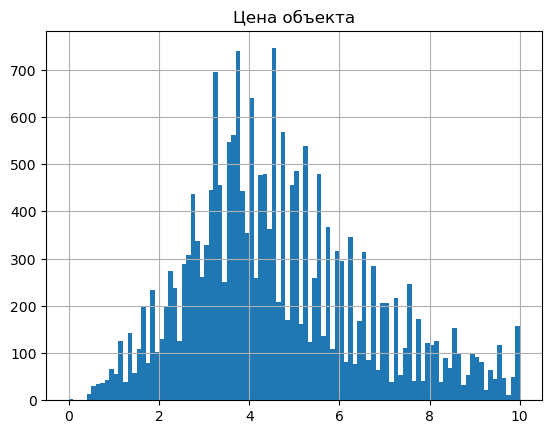

In [40]:
data.hist('last_price', bins=100, range=(0, 10));
plt.title('Цена объекта');

Цена объекта

Как видно по гистограмме основная ценовая категория от 3 до 5 млн. руб. 

Также видно аномальное значение - стоимость в районе 0, избавимся от него.

In [41]:
data[data['last_price'] < 0.02]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,weekday,month,year,mk_price,floor_type,city_centers_m
353,2.5,0.000003,2.5,1970-01-01 00:00:00.000000002,2,2.70,2,2.7,2,2.5,2.7,2.5,2.5,2.7,NaN,2.7,2.26,2.75,2.7,3.2,10.0,2.7,3,1,1970,0.000001,последний,0.0
8742,7.0,0.012190,109.0,2019-03-20 00:00:00.000000000,2,2.75,25,32.0,25,False,False,False,40.5,0.0,санкт-петербург,36421.0,9176.00,1.00,805.0,0.0,NaN,8.0,2,3,2019,0.000112,последний,9.0


In [42]:
data = data.query("index not in [353, 8742]")
data[data['last_price'] < 0.02]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,weekday,month,year,mk_price,floor_type,city_centers_m


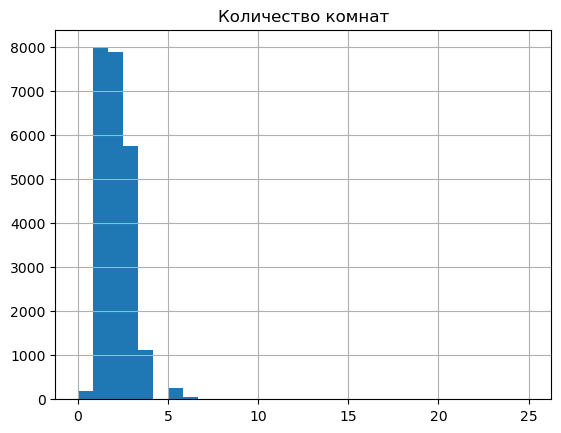

In [43]:
data.hist('rooms', bins=30, range=(0,25));
plt.title('Количество комнат');

Количество комнат

Больше всего двухкомнатных и трёхкомнатных квартир, но встречаются и редкие исключения. Также просматриваются квартиры с количеством комнат - 0, возможно, это квартиры - студии.

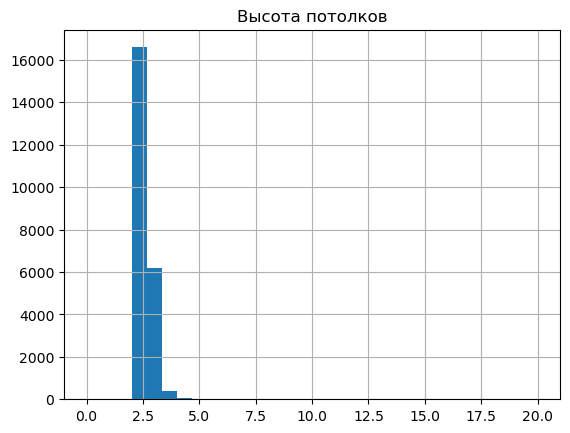

In [44]:
data.hist('ceiling_height', bins=30, range=(0,20));
plt.title('Высота потолков');

Высота потолков

Т.к. при предобработке данных пропуски в столбце ceiling_height были заменены на стандартное минимальное значение высоты потолков в 2,5 м., в гистограмме есть пик с этим значением.

,floor
floor_type,
другой,17152
первый,2888
последний,3242


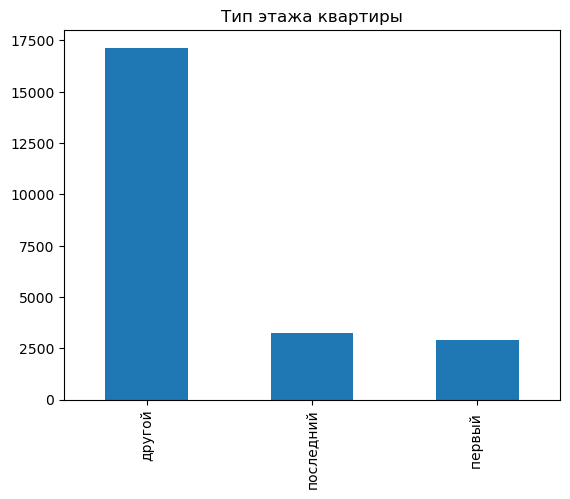

In [45]:
row = data.pivot_table(index='floor_type', values='floor', aggfunc='count')
data['floor_type'].value_counts().plot(kind='bar');
plt.title('Тип этажа квартиры');
row

Тип этажа квартиры 

Здесь видно, что объявлений с недвижимостью на первом и последнем этаже значительно меньше, чем с "другим" этажом, что является логичным, ведь их в принципе меньше, по сравнению с этажами объединенных в категорию "другие".

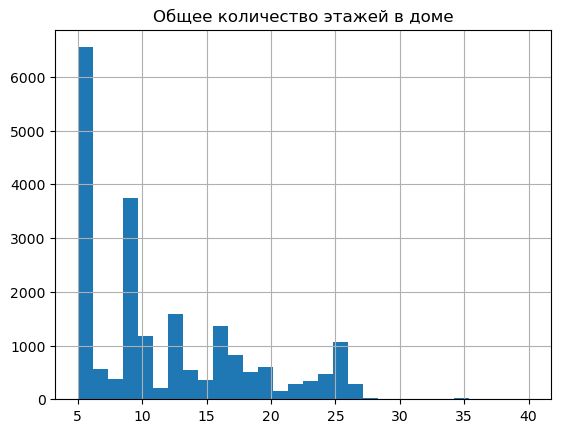

In [46]:
data.hist('floors_total', bins=30, range=(5,40));
plt.title('Общее количество этажей в доме');

Общее количество этажей в доме

Тут тоже все ожидаемо, больше всего 5-этажных домов и 9-этажный, высотные многоэтажные дома стали строить относительно недавно, поэтому их меньше. 

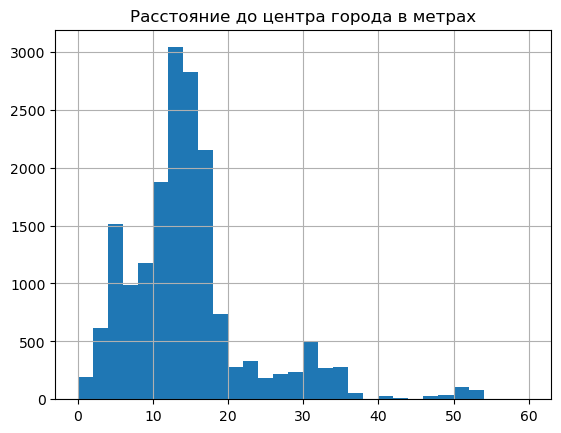

In [47]:
data.hist('city_centers_m', bins=30, range=(0,60));
plt.title('Расстояние до центра города в метрах');

Расстояние до центра города в метрах

Здесь наблюдаем два пика, один маленький, 5 км. и один большой 13-16 км. Есть недвижимость для продажи и в районе 50-55 км., ее значительно меньше и это понятно, в районах в основном частные дома, а не многоэтажки, поэтому город всегда будет лидировать по количеству объявлений. 

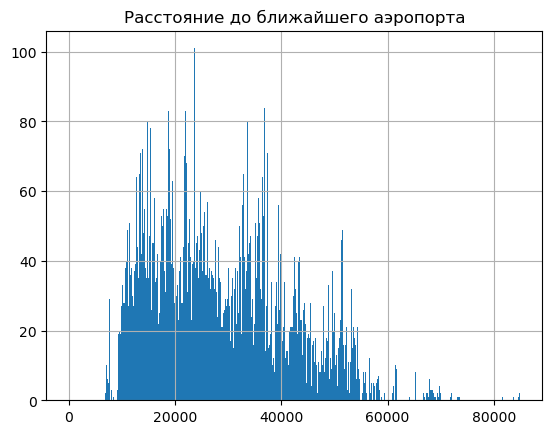

In [48]:
data.hist('airports_nearest', bins=1000);
plt.title('Расстояние до ближайшего аэропорта');

Расстояние до ближайшего аэропорта

Вполне ожидаемо,аэропорты - это редкие объекты и расположены в основном за территорией города.

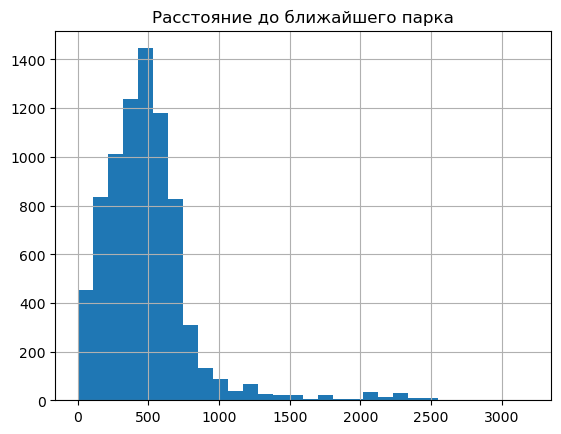

In [49]:
data.hist('parks_nearest', bins=30);
plt.title('Расстояние до ближайшего парка');

Расстояние до ближайшего парка

Судя по графику больше всего квартир с парками на расстоянии 400-500м.

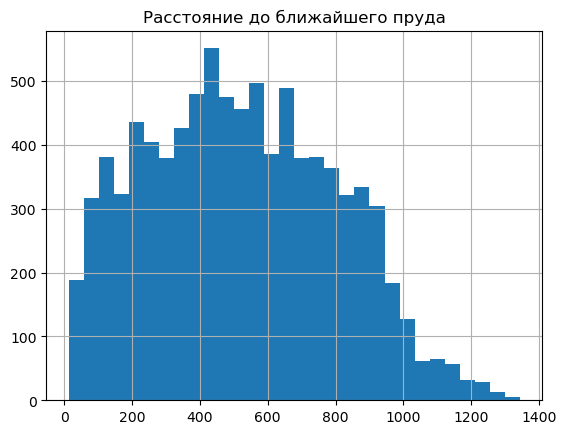

In [50]:
data.hist('ponds_nearest', bins=30);
plt.title('Расстояние до ближайшего пруда');

Расстояние до ближайшего пруда

Судя по графику больше всего квартир с прудами на расстоянии 400-500м. так же как и парки, в принципе тоже закономерно, где пруд там и парк.

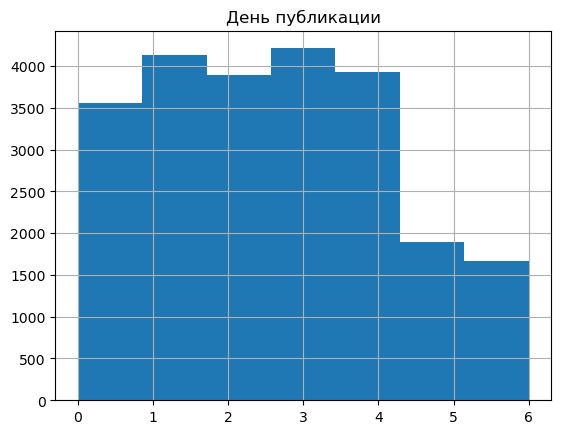

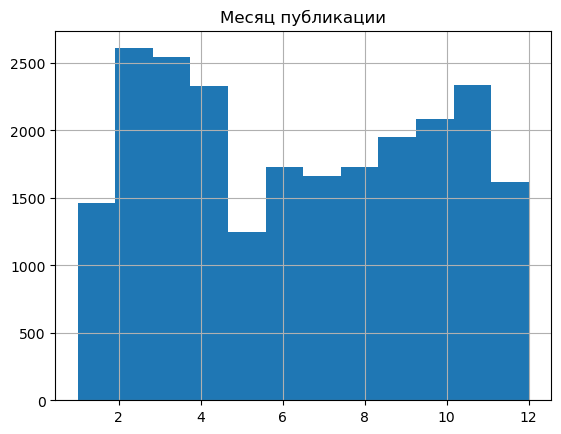

In [51]:
data.hist('weekday', bins=7);
plt.title('День публикации');
data.hist('month', bins=12);
plt.title('Месяц публикации');

День и месяц публикации объявления

Видим, что в будние дни размещение объявлений происходит практически равномерно, а размещения в субботу и воскресенье, меньше всего, что в принципе логично. 

Так же видим, что с февраля по апрель наблюдалась повышенная активность, думаю, это связано с после-праздничным периодом, а в декабре, январе и мае провалы, это объясняется праздниками.  

Так же был плавный рост активности с июля по ноябрь, тоже в принципе закономерно.

**Вывод:**

После проведения предобработки данных значительно изменились гистограммы по сравнению c выводимыми в начале исследования. Стали более закономерны и логичны.

**Исследование, как бысто продавались квартиры**

In [52]:
days_exposition_mean = round(data['days_exposition'].mean())
days_exposition_median = round(data['days_exposition'].median())
print('Среднее время продажи квартиры в днях:', days_exposition_mean)
print('Медианное время продажи квартиры в днях:', days_exposition_median)

Среднее время продажи квартиры в днях: 180
Медианное время продажи квартиры в днях: 95


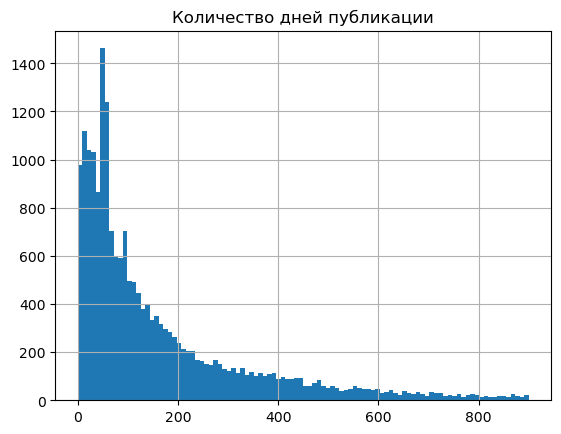

In [53]:
data.hist('days_exposition', bins=100, range=(0,900));
plt.title('Количество дней публикации');

**Вывод**

Медианное время продажи - 95 дней, среднее время продажи - 180 дней, данные так расходятся из-за квартир, проданных всего за несколько дней после публикации и из-за квартир, которые продавались очень долго, несколько лет.

Быстрой продажей можно назвать срок до 50 дней. Долгой продажей - срок от 230 дней.

**Факторы, больше всего влияющие на общую (полную) стоимость объекта**

In [54]:
data1 = data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms']].corr()
data1

,last_price,total_area,living_area,kitchen_area,rooms
last_price,1.000000,0.731449,0.624173,0.583545,0.429266
total_area,0.731449,1.000000,0.928837,0.605668,0.785139
living_area,0.624173,0.928837,1.000000,0.382252,0.860936
kitchen_area,0.583545,0.605668,0.382252,1.000000,0.252205
rooms,0.429266,0.785139,0.860936,0.252205,1.000000


Здесь видим, что коэффициент корреляции  — положительный. 
Больше всего на стоимость объекта влияют, по убыванию:

    1)общая площадь - корреляция 0.73
    2)жилая площадь - 0.62
    3)площадь кухни - 0.58 
    4)количество комнат - 0.42 

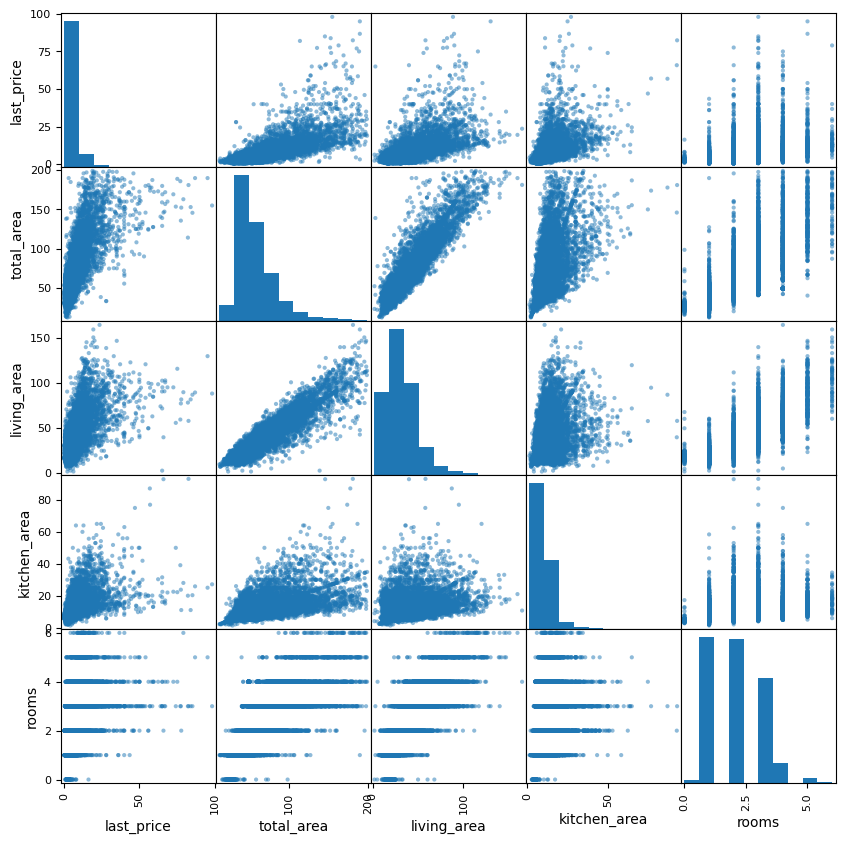

In [55]:
data2 = data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms']]
pd.plotting.scatter_matrix(data2, figsize=(10, 10))
plt.show()

In [56]:
data3 = data[['last_price', 'rooms', 'floor', 'days_exposition']].corr()
data3

,last_price,rooms,floor,days_exposition
last_price,1.000000,0.429266,0.055674,0.119645
rooms,0.429266,1.000000,-0.155929,0.118135
floor,0.055674,-0.155929,1.000000,-0.037706
days_exposition,0.119645,0.118135,-0.037706,1.000000


Коэффициент корреляции между стоимостью и количества комнат равен 0.42, значит коэффициент корреляции положительный, связь присутствует, но она меньше, чем связь между стоимостью и общей площадью, жилой площадью, площадью кухни. Корреляция стоимости и этажа, так же как корреляция стоимости и дня размещения рекламы практически нулевая, можно сказать, что данные параметры практически не влияют на стоимость недвижимости.

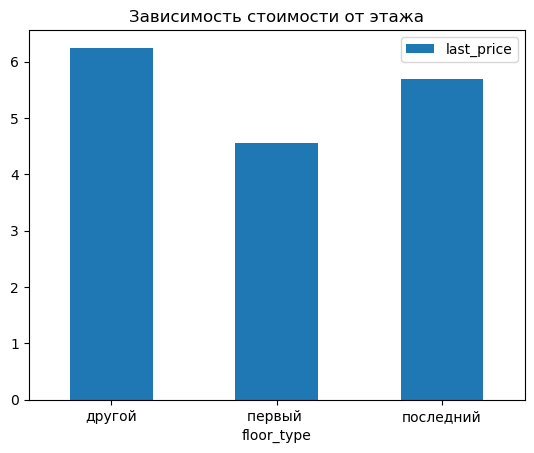

In [57]:
data_5 = data.pivot_table(index='floor_type', values='last_price')
data_5.plot.bar(rot = 0);
plt.title('Зависимость стоимости от этажа');

Здесь цена квартиры хоть и незначительно, но зависит от этажа, выше всего стоимость квартир на "другом" этаже, ниже всего на "первом".

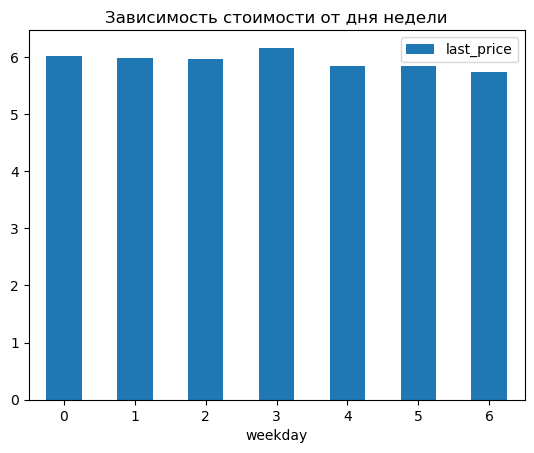

In [58]:
data_6 = data.pivot_table(index='weekday', values='last_price')
data_6.plot.bar(rot = 0);
plt.title('Зависимость стоимости от дня недели');

Здесь корреляция незначительная, практически равна 0.

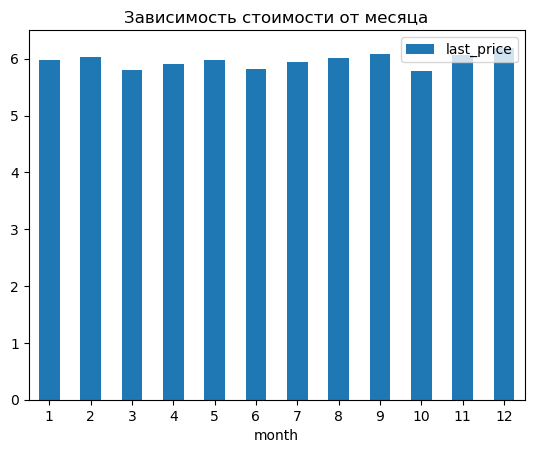

In [59]:
data_7 = data.pivot_table(index='month', values='last_price')
data_7.plot.bar(rot = 0);
plt.title('Зависимость стоимости от месяца');

Здесь корреляция незначительная, практически равна 0.

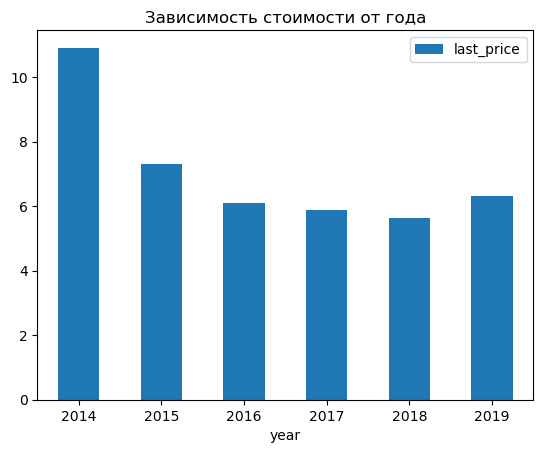

In [60]:
data_8 = data.pivot_table(index='year', values='last_price')
data_8.plot.bar(rot = 0);
plt.title('Зависимость стоимости от года');

Здесь мы наблюдаем снижение стоимости в зависимости от года, в 2014 г. стоимость значительно больше по сравнению с последующими, но затем цена падала до 2019 года.

**Посчитаем среднюю цену одного квадратного метра в 10 населенных пунктах с наибольшим числом объявлений**

In [61]:
data_9 = data.pivot_table(index='locality_name', values=['first_day_exposition'], aggfunc='count').sort_values(by='first_day_exposition', ascending=False).head(10)
data_9['mk_price_mean'] = data.pivot_table(index='locality_name', values='mk_price', aggfunc='mean')
data_9

,first_day_exposition,mk_price_mean
locality_name,,
санкт-петербург,15393,0.113152
мурино,584,0.086018
кудрово,470,0.095261
шушары,439,0.078551
всеволожск,398,0.068654
пушкин,364,0.103123
колпино,337,0.075333
парголово,326,0.090332
гатчина,306,0.068758


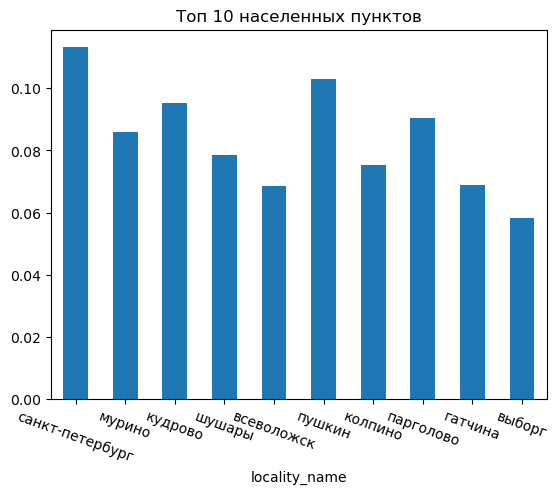

In [62]:
data_9['mk_price_mean'].plot.bar(rot = -20);
plt.title('Топ 10 населенных пунктов');

**Вывод**

Как и ожидалось, самая высокая стоимость кв.м. в Санкт-Петербурге, а самая низкая стоимость в Выборге. Остальные города входящие в 10 - это наиболее близкие к Санкт-Петербургу.

**Вычислим среднюю цену каждого км до центра**

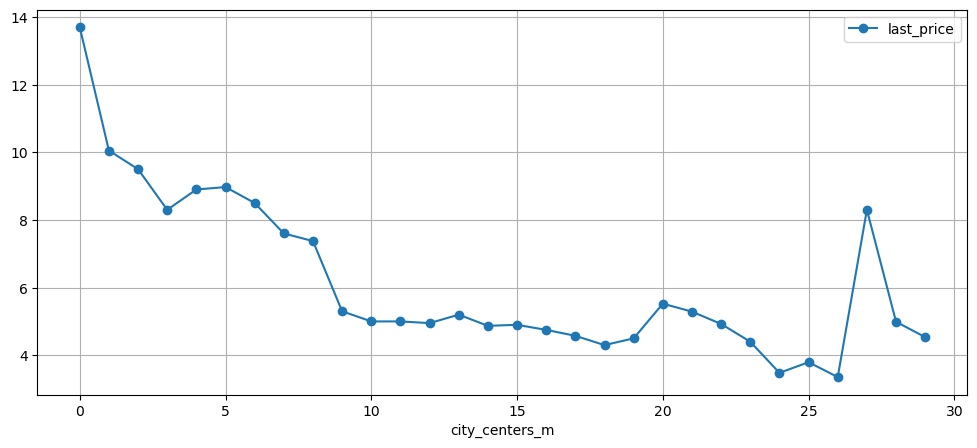

In [63]:
data_km = data.query('locality_name == "санкт-петербург"')
data_km = data_km.pivot_table(index='city_centers_m', values='last_price', aggfunc='median')
data_km.plot(grid=True, style ='o-', figsize=(12, 5));

**Вывод**

Здесь тоже есть закономерность, чем ближе расположена недвижимость к центру, тем она дороже. Хотя есть пик в 27 км., возможно – это, элитный район. Чуть повышается цена в районе 5 км., тут возможно присутствует "неформальный" центр города. 

### Общий вывод:

Получив данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет, столкнулись с большим количеством пропусков в столбцах, которые, могут влиять, как на среднюю стоимость объектов, так и на анализ выделенных групп, в частности. Поэтому некоторые данные мы заполнили средними и медианными значениями, а также логическими, такими как минимальная высота потолков, это необходимо для того, чтобы не терять основной массив статистических данных, а некоторые данные оставили без изменений с пропущенными значениями.

После избавления данных от пропусков, дубликатов и аномальных значений, выполнили такие операции как, подсчёт средней стоимости квадратного метра, статистику по скорости продажи объекта с даты размещения объявления, стоимость каждого километра удаления от центра, выявили какие факторы больше всего влияют на стоимость объекта, сгруппировали 10 населенных пунктов с большим количеством объявления для подсчета самой высокой и низкой стоимостью квадратного метра. 

Из чего можно сделать вывод, что:

Чаще всего объект продают за 95 дней, среднее время продажи - 180 день, долгой продажей можно назвать срок с 230 дней. 

Больше всего на стоимость объекта влияют: общая площадь, жилая площадь, площадь кухни, количество комнат. Цена практически на зависит от: даты размещения объявления и этажа, на котором расположена квартира, кроме первого и последнего, эти этажи не пользуются популярностью. 

Дороже всего квадратный метр в Санкт-Петербурге - 113152, а дешевле в Выборге - 58142.

Расстояние до центра города влияет на стоимость объекта пропорционально удаленности, чем ближе расположена недвижимость к центру, тем она дороже. Хотя есть объекты, удаленные от центра, но с высокой стоимостью, возможно – это элитный район. 

Итого в большинстве случаев покупки жилья люди выбирают квартиры площадью 30-60 кв.м., 1-2 комнатные квартиры, с площадью кухни 10-15 кв.м., в ценовой категории 3-5 млн.р., стандартной высотой потолков, с любым этажом, кроме первого и последнего в 5-9 этажном доме, с удаленностью от центра города начиная с 5 км.
